# Máquina de Atwood | Ligaduras

[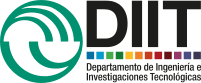](https://ingenieria.unlam.edu.ar/)  
2024 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)

---

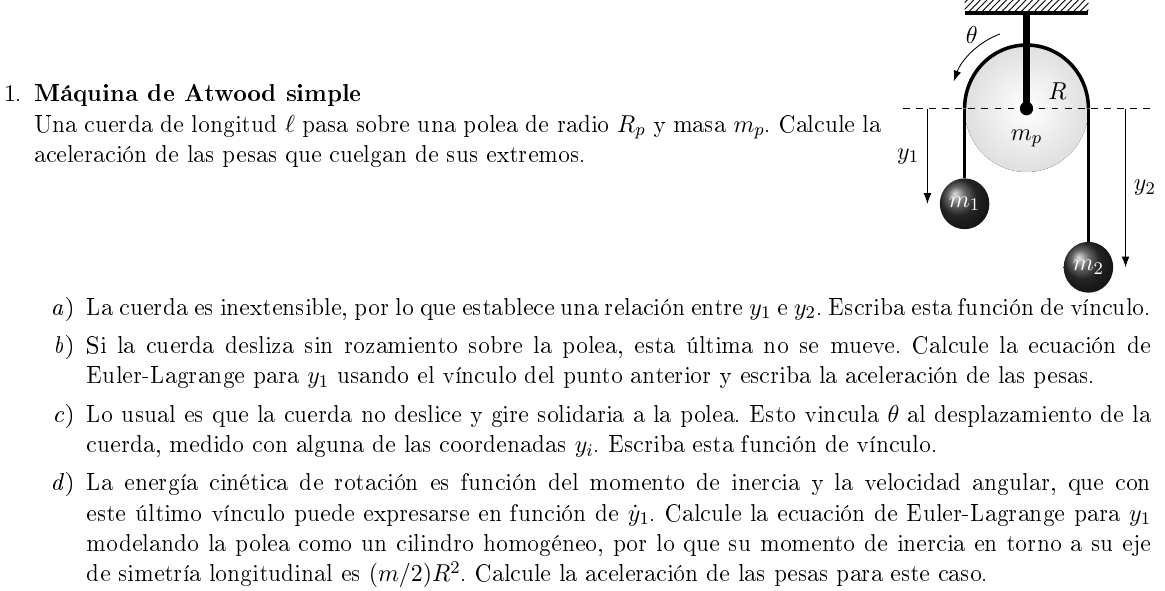

In [102]:
import sympy as sm # módulo de cálculo simbólico
from sympy.physics import mechanics as me
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [103]:
# Parámetros físicos del sistema
polea_m, polea_R, m1, m2, g, l = sm.symbols('m_{polea}, R_{polea}, m_1, m_2, g, \ell', positive=True)

## a) Ligaduras
Cada vez que el modelo físico asume una relación entre coordenadas o velocidades generalizades se establere una **ligadura** entre estas.

#### Longitud de la cuerda
De considerar inextensible a la cuerda, es decir que mantiene su longitud $\ell$ como constante se establece una ligadura entre las coordenadas de ambas pesas que cuelgan desde la polea.

Puesto que de la circunferencia de la polea de radio $R_{polea}$ la cuerda cubre un arco de la mitad de la misma $\pi R_{polea}$, su longitud total $\ell$ corresponde a la suma de este con la distancia vertical que separa su centro de masa con el de las pesas que cuelgan según
$$
y_1+ y_2 + \pi R_{polea} = \ell
$$
Tal relación es mejor escribirle como una función homogénea (igualada al valor nulo $0$)
$$
f_1(y_1, y_2) = y_1+ y_2 + \pi R_{polea} - \ell = 0
$$

In [104]:
y1, y2 = me.dynamicsymbols('y_1, y_2')
ligadura_longitudCuerda = sm.Eq(y1+ y2 + sm.pi* polea_R - l, 0 ) # ligadura l como función homogénea
ligadura_longitudCuerda

## b) Euler-Lagrange para $y_1$

### Posiciones

Más allá del problema de las ligaduras, el procedimiento habitual de definir las posiciones de los cuerpos de interes en en sistema de referencia cartesiando utilizando para esto las coordenadas generalizadas es la más adecuado.

Si se toma como origen de tal sistema el centro de la polea con el versor $\hat{x}$ hacia la derecha y el $\hat{y}$ hacia arriba, las posiciones de los cuerpos son:

In [105]:
# Sistema de coordenadas
e = me.ReferenceFrame('e') # sistema de coordenadas

In [106]:
pesa1_r = (-polea_R * e.x) + (-y1 * e.y) # posición de la pesa 1
pesa2_r = (polea_R * e.x) + (-y2 * e.y) # posición de la pesa 2
pesa1_r, pesa2_r

Para lo atañe a lo pedido en este enunciado la posición en $\mathbf{\hat{e}_x}$ es irrelevante, pero es bueno dejarle expresada por si en el futuro se utiliza tal información.

### Reducción del número de coordenadas generalizadas

Usualmente al conocer la función de ligadura se la aprovecha para despejaría una de las coordenadas o velocidades generalizadas en función de las otras y así reducir el número de grados de libertad requeridos para describir el sistema.

Solo los centros de masa de la pesas que cuelgan de la polea se desplazan.
Y el vector posición de ambas puede expresarse usando una única coordenada generalizada explotando la primera de las funciones de ligadura.

Para despejar esta coordenada de la función de ligadura puede hacerse uso del método `solveset` que resuelvo ecuaciones algebraicas univariadas.
Existen alternativas cuando hay más de una variable, `linsolve` para sistemas de ecuaciones lineales y `nonlinsolve` para no lineales, pero en este caso no son necesarias.

In [107]:
y2_longitudCuerda =  sm.Eq(
  y2,
  sm.solveset(ligadura_longitudCuerda, y2).args[0] # args[0] para seleccionar la primer solución (en este caso la única)
)
y2_longitudCuerda

Los métodos de despeje de variables simbólicas de `sympy` pueden devolver un conjunto de soluciones compatibles con la ecuación inicial, por lo que es necesario seleccionar una de las soluciones.

In [108]:
pesa2_r = pesa2_r.subs(y2, y2_longitudCuerda.rhs)
pesa1_r, pesa2_r

### Energía cinética de traslación

In [109]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [110]:
# Energía cinética del sistema
pesa1_T = energíaCinéticaTraslación(m1, pesa1_r, e)
pesa2_T = energíaCinéticaTraslación(m2, pesa2_r, e)
T_traslación = sm.Eq(
  pesa1_T.lhs,
  pesa1_T.rhs + pesa2_T.rhs
  ).simplify()
T_traslación

### Energía potencial gravitatoria

In [111]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [112]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
pesa1_V = energíaPotencialGravitatoria(m1, pesa1_r, g_vector)
pesa2_V = energíaPotencialGravitatoria(m2, pesa2_r, g_vector)
V = sm.Eq(
  pesa1_V.lhs,
  pesa1_V.rhs + pesa2_V.rhs ).simplify()
V

### Lagrangiano del sistema
Recordemos que hay un único Lagrangiano por sistema calculado con sus energías cinética y potencial que en el caso más general puede depender de las coordenadas y velocidades generalizadas, así como explícitamente con el tiempo
$$
\mathcal{L}(q_i, \dot{q}_i, t) = T(q_i, \dot{q}_i, t)- V(q_i, \dot{q}_i, t).
$$

Si se obvió cualquier consideración sobre la polea, tanto la coordenada generalizada que describe su orientación $\theta$, como la correspondiente velocidad generalizada $\dot{\theta}$, estarán ausentes del Lagrangiano que resulta una función de la coordenada generalizada $y_1$ y la velocidad generalizada $\dot{y}_1$
$$
\mathcal{L}(y_1, \dot{y}_1) = T(\dot{y}_1)- V(y_1).
$$

In [113]:
sm.Eq(sm.Symbol('\mathcal{L}'), (T_traslación.rhs - V.rhs).simplify() )

Recordemos que la función que antes escribimos la función `euler_lagrange` que calcula internamente el Lagrangiano, por lo que no es necesario calcularlo manualmente.
La discusión de esta sección busca recordar que esta función es única para el sistema y que son las ecuaciones de Euler-Lagrange las que se derivarán para cada coordenada generalizada.
En este caso que solo hay una coordenada generalizada, solo habrá una ecuación de Euler-Lagrange. 

### Un único grado de libertad, una única ecuación de Euler-Lagrange

Aunque en este caso se requiere calcular una única ecuación de Euler-Lagrange, en general se requieren tantas como como coordenadas $q$ hay en el sistema.

In [114]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sm.Eq(
        lagrangiano.diff(coordenadaGeneralizada) 
        - lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        , 0
    ).simplify()

In [115]:
y1_EL = eulerLagrange(T_traslación, V, y1)
y1_EL

### Despejando la aceleración
De la ecuación de Euler-Lagrange se podrán obtener expresiones para las $\ddot{q}$ y asignar este resultado a una variable para uso posterior.
Para esto se hacen uso de las funciones `solveset`, `linsolve` o `nonlinsolve` según corresponda.

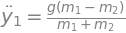

In [116]:
variable = y1.diff(t, 2)
y1_pp = sm.Eq(
  variable,
  sm.solveset(y1_EL, variable).args[0]
  )# args[0] toma el primer elemento de un conjunto (set)
y1_pp

Y con esta podemos expresar también $\ddot{y}_2$ partiendo del despeje que hicimos de $y_2$ a partir de la función de ligadura.

In [117]:
y2_pp = sm.Eq(
  y2_longitudCuerda.lhs.diff(t,2),
  y2_longitudCuerda.rhs.diff(t,2)
  )
y2_pp

Es decir...

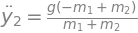

In [118]:
y2_pp = y2_pp.subs(y1_pp.lhs, y1_pp.rhs).simplify()
y2_pp

## c) La cuerda no desliza sobre la polea

Usualmente se establece otra ligadura que involucra a la cuerda.
Si al moverse no desliza en torno a la polea cambia su inclinación.
Esta última podemos describirle con un ángulo, $\theta$.

El ángulo de la polea superior es función de $y_1$ o alternativamente $y_2$.
Notar que habrá que cambiar el signo del término correspondiente de usar una u otra opción respetando el signo positivo que se da a los ángulos, en el sentido anti-horario.
Optando por la primer opción se tiene que:

In [119]:
ligaduraNoDesliza = sm.Eq(y1 - polea_R* zeta, 0)
ligaduraNoDesliza

### Energía cinética de rotación

Si bien el centro de masa de la polea no se desplaza su rotación agrega un término a la energía cinética en función de la velocidad angular $\vec{\omega}$.

Veremos más adelante en el curso, cuando introduzcamos el **tensor de inercia** $\overline{\overline{I}}$ de un cuerpo extenso, que la energía cinética de rotación se calcula como
$$
T_\mathrm{rotación} = \frac{1}{2} \overline{\overline{I}} \vec{\omega} \vec{\omega},
$$
siendo $\omega$ la **velocidad angular**. 
Esta expresión se reduce a
$$
T_\mathrm{rotación} = \frac{1}{2} I \vec{\omega}^2 ,
$$
cuando $\vec{\omega}$ está alineado con uno de los ejes de simetría del cuerpo y nos basta con conocer solo uno de los elementos del tensor, el **momento de inercia** $I$ que correspondiente a esta dirección de $\vec{\omega}$.

#### Velocidad angular de la polea

Un cambio infinitesimal del arco de cuerda sobre la polea causada por un desplazamiento de una de las pesas, e.g. $d y_1$, implica una cambio infinitesimal de $d \theta$ que responde a
$$
\frac{d y_1}{R_{polea}} = d \theta.
$$
Esto resultaría en una media vuelta si $\Delta y_1 = \pi R_{polea}$, es decir un $\Delta \theta = \pi$ ya que el perímetro de una circunferencia es $2 \pi R_{polea}$.

respetando como positivo el sentido en contra de las agujas del reloj.
Tales diferenciales se desarrollan en un infinitesimal de tiempo $d t$ lo que permite relacionar las respectivas velocidades generalizadas.

In [120]:
ligaduraNoDesliza.lhs.diff(t)

Entonces tenemos una ligadura que nos permite obviar $\dot{\theta}$ como variable y expresarle en función de $\dot{y}$.

In [121]:
variable = zeta.diff(t)
zeta_p_noDesliza = sm.Eq(
  variable,
  sm.solve(ligaduraNoDesliza.lhs.diff(t), variable)[0]
  )
zeta_p_noDesliza

#### Momento de inercia de la polea

El momento de inercia para un cilindro de masa $m_{polea}$ y radio $R_{polea}$ girando en torno a su eje longitudinal de simetría
$$
I_\mathrm{polea} = \frac{1}{2} m_{polea} R_{polea}^2.
$$

In [122]:
unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5
polea_I = sm.Eq(
    sm.Symbol('I'),
    unMedio* polea_m* polea_R**2
) # momento de inercia de rotación en torno a su eje de simetría longitudinal
polea_I

In [123]:
def energíaCinéticaRotación(momentoDeInercia, velocidadAngular):
    """
    Calcula la energía cinética de un cuerpo extenso (no puntual) que rota en torno a un eje.

    Parámetros
    ----------
    momentoDeInercia : Multiplicación Sympy (sympy.core.mul.Mul)
        Expresada en referencia al eje de rotación para la velocidadAngular.
    velocidadAngular : Multiplicación Sympy (sympy.core.mul.Mul)
        Velocidad de rotación en torno a un eje.

    Retorna
    -------
    Igualdad Sympy (sympy.Equality)
        Energía cinética de rotación (I/2)* omega**2
    """
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5
    T_rotación = sm.Eq(
        sm.Symbol('T_{rotación}'),
        unMedio* momentoDeInercia* velocidadAngular**2
     ).simplify()
    return T_rotación

In [124]:
T_rotaciónPolea = energíaCinéticaRotación(polea_I.rhs, zeta_p_noDesliza.rhs)
T_rotaciónPolea

## d) Aceleraciones contemplando la polea

Contemplando esta nueva contribución a la energía cinética del sistema esta es

In [129]:
T_conPolea = sm.Eq(
    sm.Symbol('T_\mathrm{c/polea}'),
    T_traslación.rhs + T_rotaciónPolea_x1.rhs
)
T_conPolea

Y la ecuación de Euler-Lagrange es

In [130]:
y1_EL_conPolea = eulerLagrange(T_conPolea, V, y1)
y1_EL_conPolea

Y evidéntemente menor será la aceleración

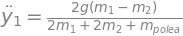

In [131]:
y1_pp_conPolea = sm.Eq(
  y1.diff(t,2),
  sm.solve(y1_EL_conPolea, y1.diff(t,2) )[0]
  )# [0] toma el único elemento de la lista
y1_pp_conPolea

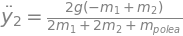

In [134]:
y2_pp = sm.Eq(
  y2_longitudCuerda.lhs.diff(t,2),
  y2_longitudCuerda.rhs.diff(t,2).subs(y1_pp_conPolea.lhs, y1_pp_conPolea.rhs)
  ).simplify()
y2_pp